In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Training Machine Learning/Unsupervised_clustering/Population_Data.csv')
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


# ***Basic Preprocessing***

### Changing object datatype to numeric

In [4]:
numeric1 = pd.DataFrame(data)
numeric = list(numeric1.drop(columns = ['Region','Office Location Id']).columns)
numeric

['Indians',
 'Foreigners',
 'Indian_Male',
 'Indian_Female',
 'Foreigners_Male',
 'Foreigners_Female',
 'Total Population']

In [5]:
def cleaner(z):
  return z.replace(',','')

In [6]:
for i in data[numeric]:
  data[i] = data[i].apply(cleaner)

data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [8]:
data[numeric]=data[numeric].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     int64 
 3   Foreigners          38 non-null     int64 
 4   Indian_Male         38 non-null     int64 
 5   Indian_Female       38 non-null     int64 
 6   Foreigners_Male     38 non-null     int64 
 7   Foreigners_Female   38 non-null     int64 
 8   Total Population    38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


## Verify Integrity of the columns

In [9]:
data[['Indians','Foreigners']].sum().sum() - data['Total Population'].sum()

0

In [10]:
data[['Indian_Male','Indian_Female','Foreigners_Male','Foreigners_Female']].sum().sum() - data['Total Population'].sum()
# There are others who do not identify themselves as male or female

-112859

In [11]:
# other = people who do not identify themselves as male or female
MF_sum = data['Indian_Male']+data['Indian_Female']+data['Foreigners_Male']+data['Foreigners_Female']

data['others'] = data['Total Population'] - MF_sum
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,others
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [12]:
data['Region'].nunique(),data['Office Location Id'].nunique()

(38, 38)

In [13]:
# REgion and office location do not provide any insight since they are all unique values thus dropped
# also Total population is the sum of indian male, indian female, foreigner male, foreigner female thus dropped
data1 = data.drop(columns = ['Region','Office Location Id','Total Population'])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,others
0,643596,2883782,440445,203151,2763718,72515,47549
1,319933,1501899,213477,106456,1449303,27671,24925
2,194379,650744,161803,32576,631660,10652,8432
3,107360,470708,85343,22017,450267,6389,14052
4,55351,329980,31796,23555,325105,3684,1191


### Normalising the variables

In [14]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = data1.columns
data1 = norm.fit_transform(data1)

data1 = pd.DataFrame(data1,columns = columns)
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,others
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544


# ***Model Building***

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data1)
pred = kmeans.predict(data1)

In [16]:
pred, len(pred)

(array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32), 38)

In [17]:
kmeans.inertia_

0.02811328589882711

In [18]:
SSE = []
for i in range(1,10):
  kmeans = KMeans(n_clusters = i,n_jobs=-1)
  kmeans.fit(data1)
  SSE.append(kmeans.inertia_)

In [19]:
frame = pd.DataFrame({'Clusters':range(1,10),'SSE':SSE})

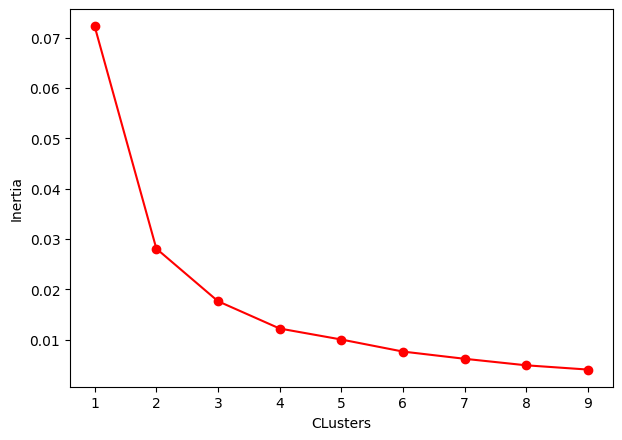

In [24]:
plt.figure(dpi = 100 ,figsize =(7,5))
plt.plot(frame['Clusters'],frame['SSE'],color = 'red',marker='o')
plt.xlabel('CLusters')
plt.ylabel('Inertia')
plt.show()
# We see that the inertia is consistent around 3,4,5 thus we take 3

In [32]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(data1)
pred = kmeans.predict(data1)

In [33]:
data1['cluster']=pred

In [38]:
def seg(str_x ,str_y ,clusters):
  X = []
  Y = []
  for i in range(clusters):
    X.append(data1[str_x][data1['cluster']==i])
    Y.append(data1[str_y][data1['cluster']==i])
  return X , Y

In [43]:
def plot_cluster(str_x ,str_y ,clusters):
  plt.figure(dpi = 100 , figsize = (5,5))

  x,y = seg(str_x , str_y,clusters)
  for i in range(clusters):
    plt.scatter(x[i],y[i],label='cluster{}'.format(i))
  plt.xlabel(str_x)
  plt.ylabel(str_y)
  plt.title(str(str_x+"Vs"+str_y))
  plt.legend()

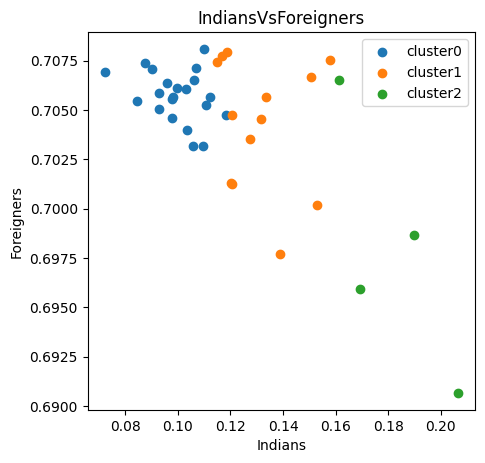

In [44]:
plot_cluster('Indians','Foreigners',3)

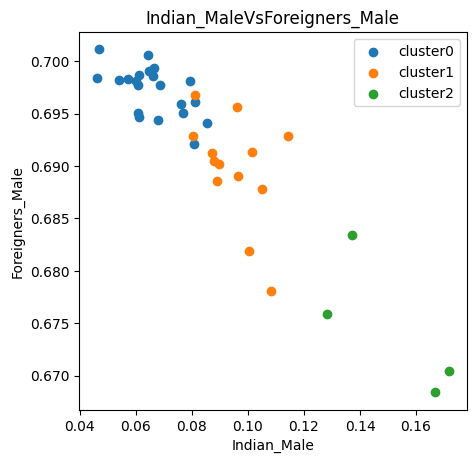

In [46]:
plot_cluster('Indian_Male','Foreigners_Male',3)